In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\JAMES TECH\Downloads\Mall_Customers.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


######  K-means Clustering

* Using annual income(k$) and spending score(1-100)

In [8]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]

In [9]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
from sklearn.cluster import KMeans
model = KMeans()
model.fit(x)

KMeans()

In [11]:
#creating clusters
model.fit_predict(x)

array([7, 6, 5, 6, 7, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 7, 6, 7, 6, 7, 6,
       5, 6, 5, 6, 7, 6, 7, 6, 5, 6, 5, 6, 5, 6, 5, 6, 7, 6, 7, 6, 7, 0,
       7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4])

######  Using elbow

In [12]:
wcss = []
for i in range(1,11):
    model =   KMeans(n_clusters = i)
    model.fit(x)
    wcss.append(model.inertia_)

In [13]:
wcss

[269981.28,
 186362.95600651755,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37564.943054771305,
 32205.07524762059,
 26162.22564746849,
 26334.769343999873,
 19664.68519600554]

######  Ploting to get the num,ber of clusters

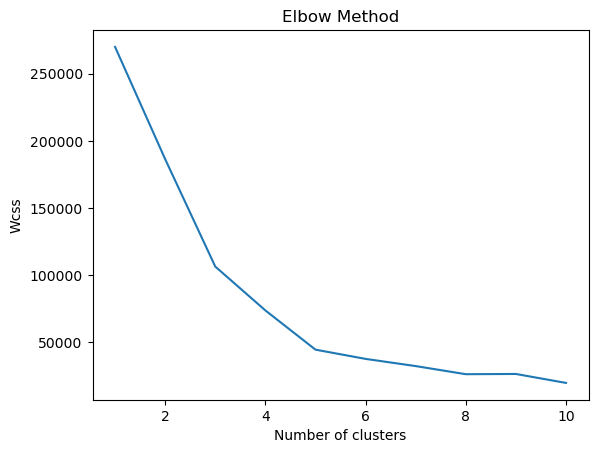

In [14]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

* There are five clusters

######  Model Training

In [15]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]

In [16]:
model = KMeans(n_clusters = 5, random_state = 42)
ymeans = model.fit_predict(x)
ymeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

###### Plotting

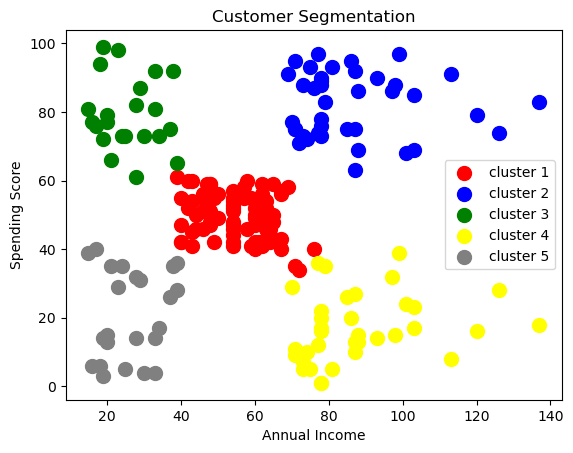

In [17]:
plt.scatter(x.iloc[ymeans==0,0],x.iloc[ymeans==0,1],s=100, c='red',label = 'cluster 1')
plt.scatter(x.iloc[ymeans==1,0],x.iloc[ymeans==1,1],s=100, c='blue',label = 'cluster 2')
plt.scatter(x.iloc[ymeans==2,0],x.iloc[ymeans==2,1],s=100, c='green',label = 'cluster 3')
plt.scatter(x.iloc[ymeans==3,0],x.iloc[ymeans==3,1],s=100, c='yellow',label = 'cluster 4')
plt.scatter(x.iloc[ymeans==4,0],x.iloc[ymeans==4,1],s=100, c='grey',label = 'cluster 5')
plt.legend()
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [26]:
model.predict([[80,21]])

array([3])

######  Save The model

In [27]:
import joblib
joblib.dump(model,'Customer Segmentation')

['Customer Segmentation']

In [28]:
Model = joblib.load('Customer Segmentation')

In [29]:
Model.predict([[15,29]])

array([4])

Since cluster start with 0, therefore ([4]) is the cluster 5

######  GUI

In [30]:
from tkinter import *
import joblib
from tkinter import Label

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    
    Model = joblib.load('Customer Segmentation')
    result = Model.predict([[p1,p2]])
    print("This customer belongs to cluster number:",result[0])
    
    if result[0]==0:
        Label(master, text='Customer with medium annaul income and medium spending score ')
    elif result[0]==1:
        Label(master, text='Customer with high annaul income but low annual spending ')
    elif result[0]==2:
        Label(master, text='Customer with low annaul income and low annaul spending ')
    elif result[0]==3:
        Label(master, text='Customer with low annaul income but high annual spending ')
    elif result[0]==4:
        Label(master, text='Customer with high annaul income and high spending score ')

master = Tk()
master.title('Customer Segmentation Using machine Learning')

label = Label(master,text='Customer Segmentation using machine Learning',bg='black',fg='white'). \
                                                                            grid(row=0,columnspan=2)

Label(master,text='Annual Income').grid(row=1)
Label(master,text='Spending Score').grid(row=2)

e1=Entry(master)
e2=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)

Button(master,text='Predict',command = show_entry_fields).grid()
    
mainloop()

This customer belongs to cluster number: 3
This customer belongs to cluster number: 1
